In [1]:
## file for video segmentation using prompt

In [6]:
from mb_annotation.utils import video_to_images

In [2]:
image_list = video_to_images(video_path="./test_data/test_video.mp4",image_save_path="./test_data/video_images",image_name="0",
                             frame_interval=1,duration=7,image_format="jpg");

Converting video to images:   0%|          | 0/773 [00:00<?, ?it/s]

Converting video to images:  27%|██▋       | 211/773 [00:06<00:18, 30.61it/s]

Video duration reached
Total frames: 773
Current frame: 211
Current time: 7.033333333333333


In [16]:
## finding bounding box of item

In [11]:
from mb_annotation.bounding_box import google_model,generate_bounding_box,add_bounding_box
from mb_annotation.utils import load_env_file
import os

load_env_file('./env');
model = google_model(model="gemini-1.5-pro-latest",api_key=os.environ.get("GOOGLE_API_KEY"))


/home/malav/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
res =generate_bounding_box(model,image_path="./test_data/video_images/0_0005.jpg",prompt='Return bounding boxes of container, for each only one return [xmin,ymin, xmax, ymax]')

In [41]:
res.text

'{\n  "container": [5,73,994,949]\n}\n'

In [42]:
import json
if type(res) != dict:
    try:
        res = json.loads(res.text)
    except:
        res = eval(res.text)
print(res)

{'container': [5, 73, 994, 949]}


In [43]:
img_bb,value = add_bounding_box(image_path="./test_data/video_images/0_0005.jpg",bounding_box=res,label="container",box_resize=True,show=False)
print(value)

[5, 140, 1073, 1822]


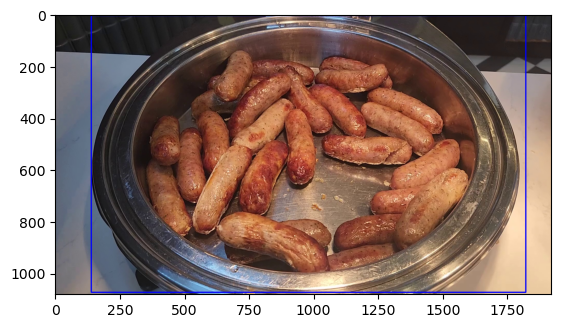

In [44]:
import matplotlib.pyplot as plt
plt.imshow(img_bb)
plt.show()

In [7]:
## sam2 video predictor - can be used for images too

In [1]:
from mb_annotation.sam2 import video_predictor

/home/malav/.local/lib/python3.11/site-packages/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


In [2]:
model_cfg= './sam2_hiera_s.yaml'
sam2_checkpoint = '/home/malav/Desktop/segment-anything-2/checkpoints/sam2_hiera_small.pt'
test_vp = video_predictor(model_cfg,sam2_checkpoint,device='cpu')

In [3]:
test_vp.inference_state(video_image_folder='./test_data/video_images')

frame loading (JPEG): 100%|██████████| 205/205 [00:07<00:00, 27.62it/s]


points : [[ 250.  600.]
 [1000.  700.]]
labels : [1 0]
bbox : [ 140.    5. 1822. 1073.]


/home/malav/.local/lib/python3.11/site-packages/sam2/sam2_video_predictor.py:873: UserWarning: cannot import name '_C' from 'sam2' (/home/malav/.local/lib/python3.11/site-packages/sam2/__init__.py)

Skipping the post-processing step due to the error above. You can still use SAM 2 and it's OK to ignore the error above, although some post-processing functionality may be limited (which doesn't affect the results in most cases; see https://github.com/facebookresearch/segment-anything-2/blob/main/INSTALL.md).
  pred_masks_gpu = fill_holes_in_mask_scores(


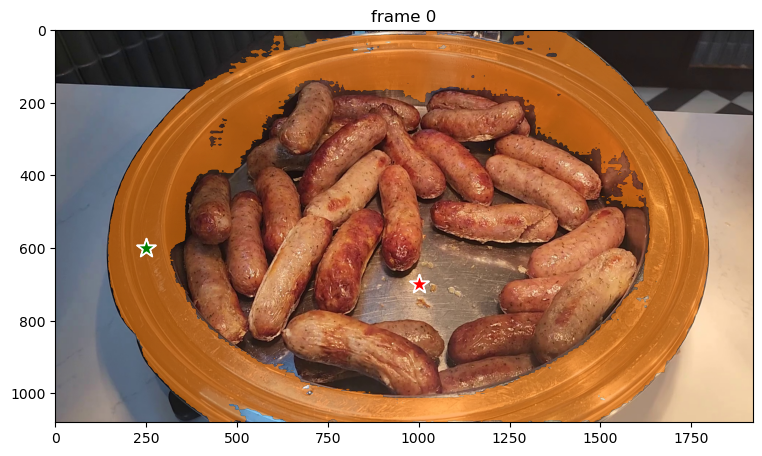

In [4]:
test_vp.predict_item(bbox=[ 140,5,1822,1073],points=[[250, 600],[1000,700]],labels=[1,0]) ## the bbox cordinates are different from google gemini output. check order

propagate in video: 100%|██████████| 205/205 [11:19<00:00,  3.32s/it]


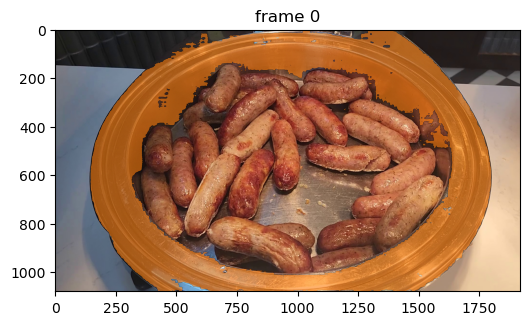

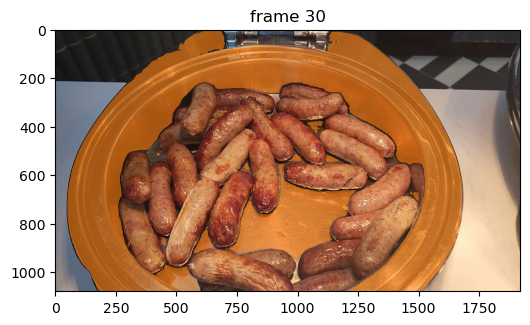

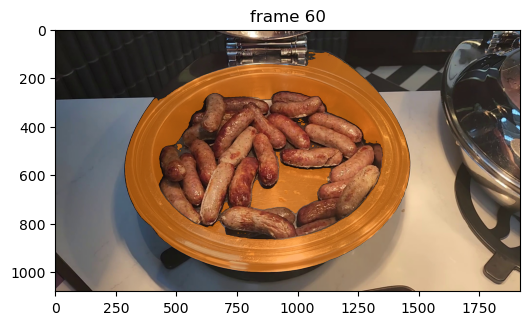

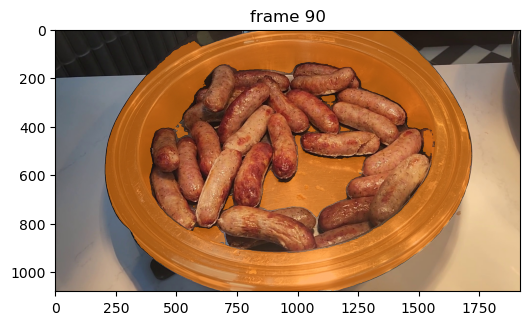

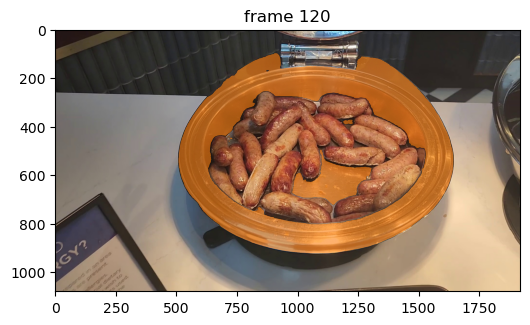

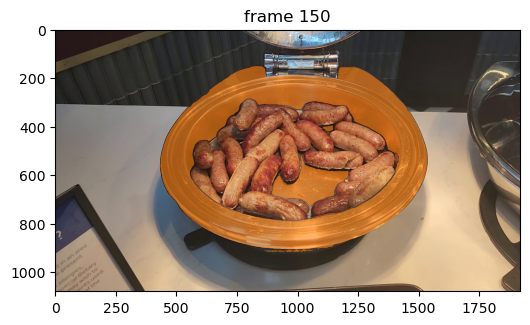

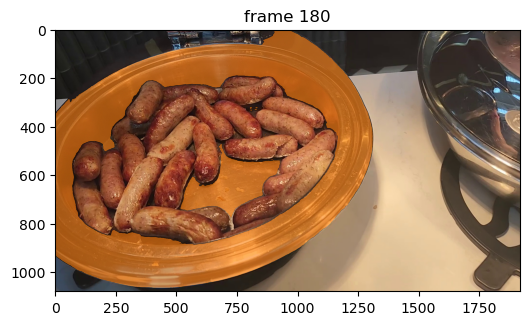

In [5]:
test_vp.predict_video()

In [8]:
## for image

In [1]:
from mb_annotation.sam2 import image_predictor

/home/malav/.local/lib/python3.11/site-packages/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


In [2]:
model_cfg= './sam2_hiera_s.yaml'
sam2_checkpoint = '/home/malav/Desktop/segment-anything-2/checkpoints/sam2_hiera_small.pt'
test_image = image_predictor(model_cfg,sam2_checkpoint,device='cpu')

In [12]:
res =generate_bounding_box(model,image_path="./test_data/4.jpg",prompt='Return bounding boxes of container, for each only one return [xmin,ymin, xmax, ymax]')

In [13]:
res.text[:-1]

'[0 35 986 968]'

In [14]:
import json
if type(res) != dict:
    try:
        res = json.loads(res.text)
    except:
        try:
            res = eval(res.text)
        except:
            res = res.text[:-1]
print(res)

[0 35 986 968]


[0, 22, 473, 619]


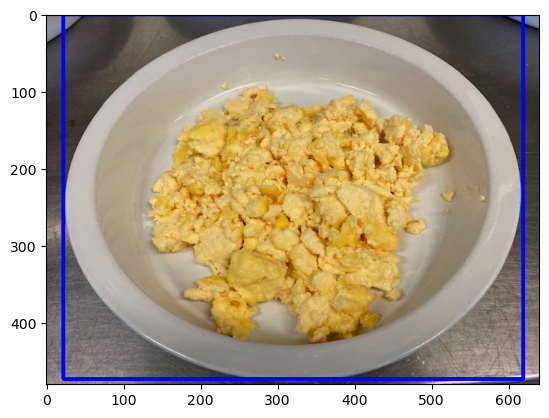

In [18]:
import matplotlib.pyplot as plt

res = [0, 35, 986 ,968]
img_bb,value = add_bounding_box(image_path="./test_data/4.jpg",bounding_box=res,label="container",box_resize=True,show=False)
print(value)
plt.imshow(img_bb)
plt.show()

In [19]:
test_image.set_image(image="./test_data/4.jpg")

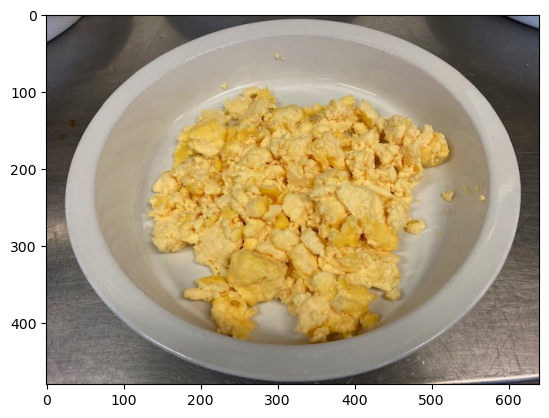

In [20]:
from matplotlib import pyplot as plt
plt.imshow(test_image.image)

points : [[250. 310.]
 [300. 200.]
 [ 50. 450.]]
labels : [1 1 0]
{'point_coords': array([[250., 310.],
       [300., 200.],
       [ 50., 450.]], dtype=float32), 'point_labels': array([1, 1, 0], dtype=int32)}


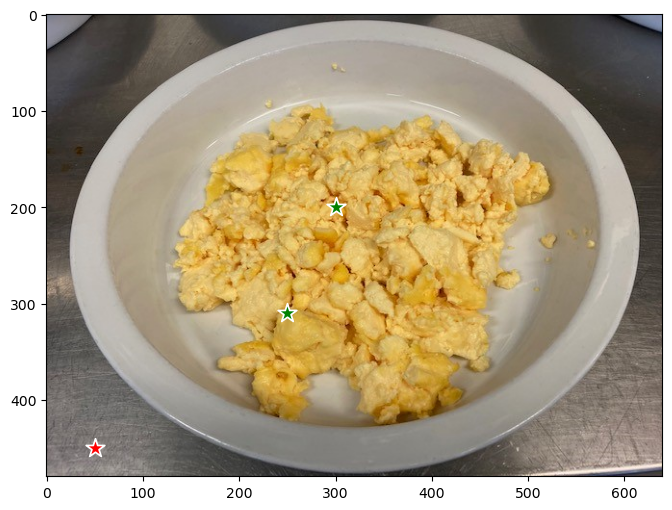

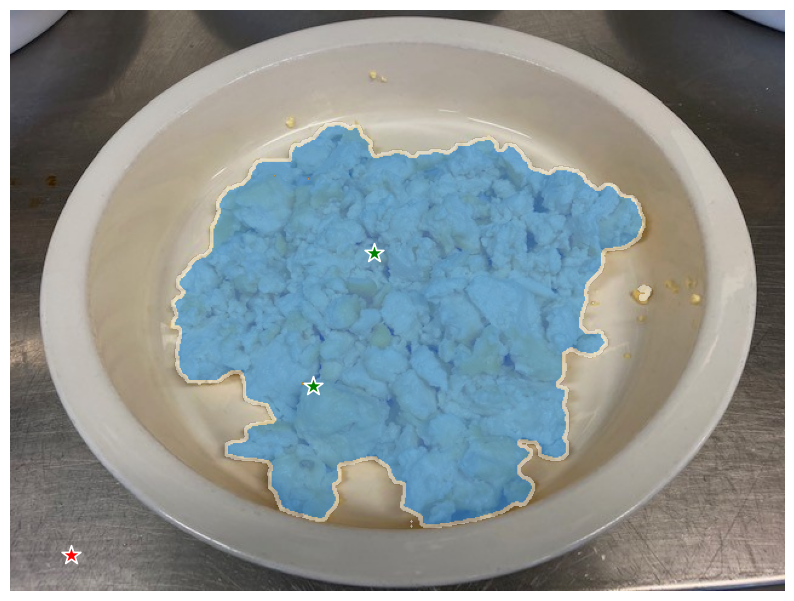

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32),
 array([0.58805496], dtype=float32),
 array([[[-3.770974 , -6.3882484, -3.5908523, ..., -5.485555 ,
          -3.0557146, -5.051813 ],
         [-6.456696 , -4.070792 , -6.065257 , ..., -3.6645217,
          -4.9777308, -3.3126779],
         [-3.5149632, -5.630876 , -3.6247106, ..., -4.5503983,
          -2.973078 , -4.7536335],
         ...,
         [-6.261875 , -5.572549 , -6.8712525, ..., -4.8014545,
          -6.7705755, -4.4509373],
         [-4.5676413, -7.5855455, -5.1949797, ..., -6.0673842,
          -4.017416 , -5.6408625],
         [-5.814223 , -4.781885 , -6.0742006, ..., -4.476967 ,
          -6.033891 , -4.8604856]]], dtype=float32))

In [25]:
test_image.predict_item(points=[[250, 310],[300,200],[50,450]],labels=[1,1,0],show=True)

bbox : [ 22.   0. 619. 473.]
{'box': array([ 22.,   0., 619., 473.], dtype=float32)}


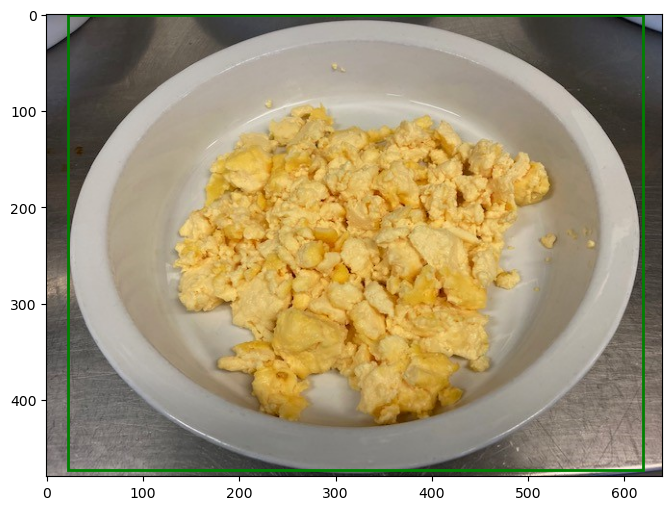

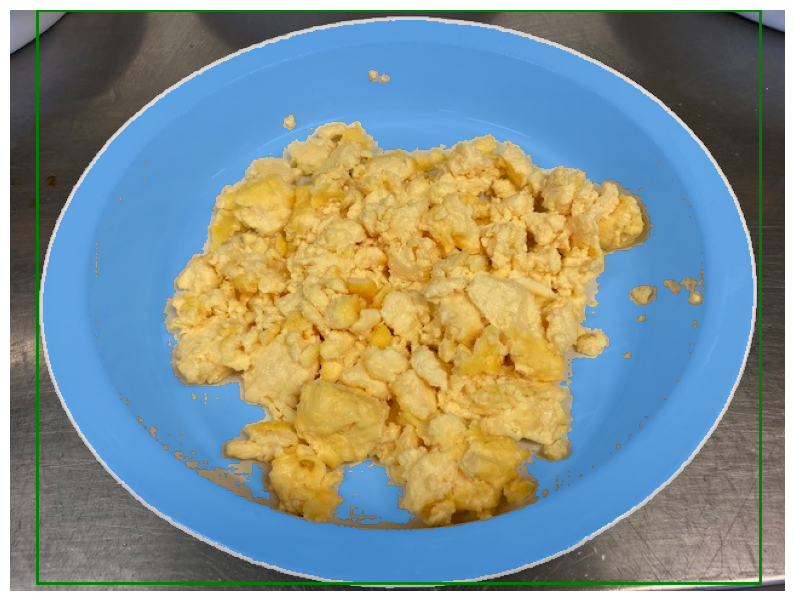

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32),
 array([0.9616906], dtype=float32),
 array([[[-2.4524086, -3.6175556, -2.322116 , ..., -3.3004317,
          -1.7283368, -3.0775366],
         [-3.4602973, -2.5832603, -3.159206 , ..., -2.4696538,
          -3.1297252, -2.1374059],
         [-2.4442432, -3.609971 , -2.0542312, ..., -3.5984926,
          -1.9416507, -3.308229 ],
         ...,
         [-3.318457 , -2.959494 , -3.3683136, ..., -2.3571143,
          -3.0050907, -2.8538032],
         [-2.4880304, -2.7727287, -2.3580472, ..., -5.651313 ,
          -4.351786 , -6.1332803],
         [-2.5993   , -2.039302 , -2.4600255, ..., -3.511946 ,
          -3.9019938, -3.9624074]]], dtype=float32))

In [22]:
test_image.predict_item(bbox=[0, 22, 473, 619],show=True)

points : [[250. 300.]
 [ 50. 450.]]
labels : [1 0]
bbox : [ 22.   0. 619. 473.]
{'point_coords': array([[250., 300.],
       [ 50., 450.]], dtype=float32), 'point_labels': array([1, 0], dtype=int32), 'box': array([ 22.,   0., 619., 473.], dtype=float32)}


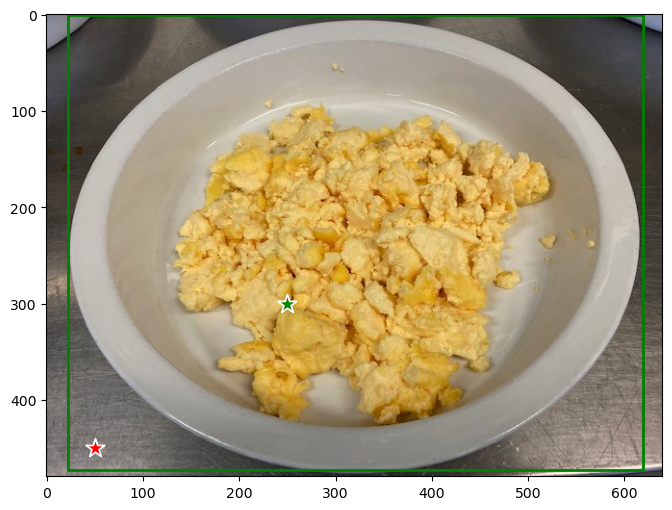

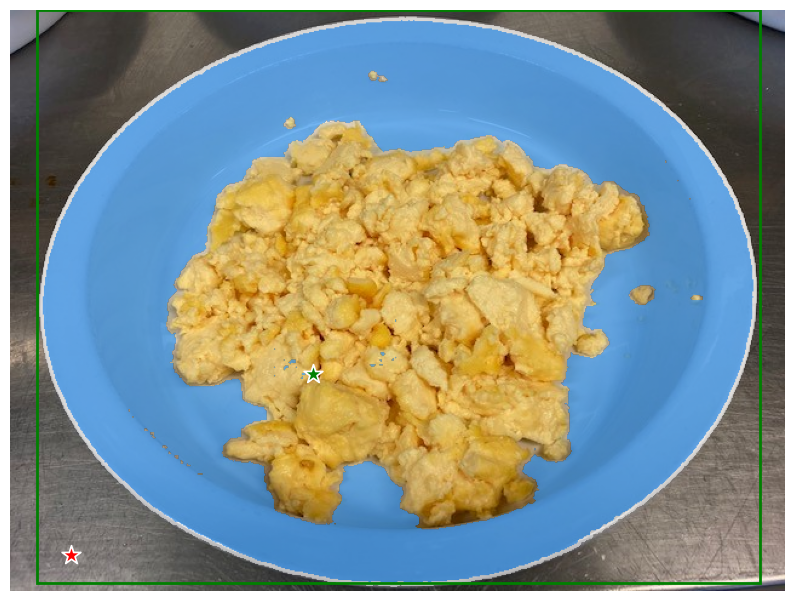

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32),
 array([0.86719465], dtype=float32),
 array([[[-3.8002574, -5.0405674, -3.8305302, ..., -4.4427757,
          -2.880805 , -4.0823555],
         [-5.0148587, -3.958696 , -4.70559  , ..., -3.4799783,
          -3.9450827, -3.152402 ],
         [-3.9439204, -5.2498035, -4.058872 , ..., -4.4299574,
          -3.0855038, -4.3660793],
         ...,
         [-6.6994243, -5.1757846, -6.5342445, ..., -3.9745643,
          -5.1092973, -4.4616575],
         [-4.752575 , -6.392224 , -4.7383676, ..., -6.8399463,
          -5.1135798, -6.97615  ],
         [-6.1801114, -4.8156796, -5.622734 , ..., -4.4793615,
          -5.7003837, -5.17344  ]]], dtype=float32))

In [23]:
test_image.predict_item(bbox=[0, 22, 473, 619],points=[[250, 300],[50,450]],labels=[1,0],show=True)

points : [[250. 300.]
 [300. 200.]
 [ 50. 450.]]
labels : [1 1 0]
bbox : [ 22.   0. 619. 473.]
{'point_coords': array([[250., 300.],
       [300., 200.],
       [ 50., 450.]], dtype=float32), 'point_labels': array([1, 1, 0], dtype=int32), 'box': array([ 22.,   0., 619., 473.], dtype=float32)}


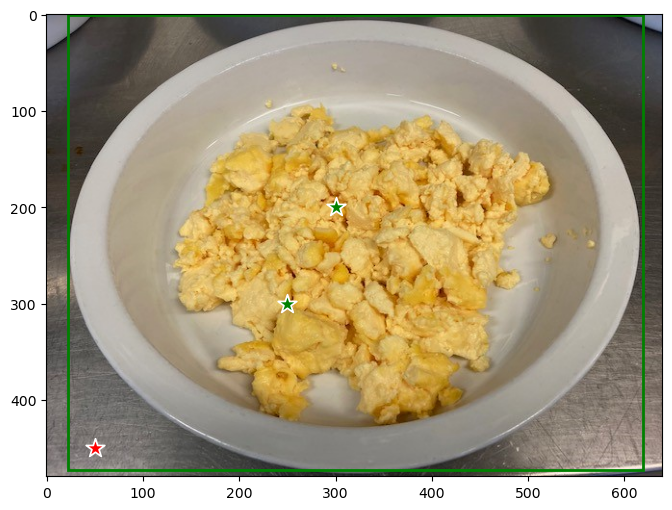

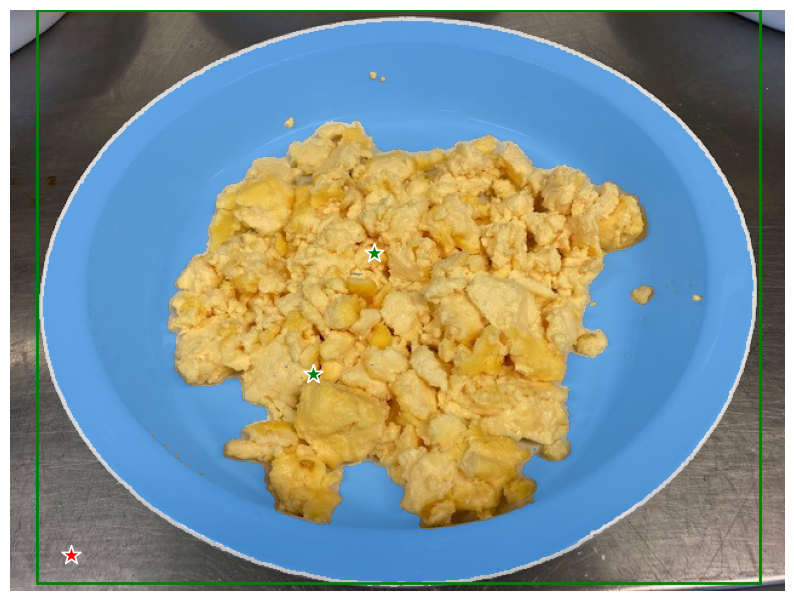

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32),
 array([0.8086676], dtype=float32),
 array([[[-3.6673322, -5.13086  , -3.6329317, ..., -4.596077 ,
          -2.7991803, -4.2475085],
         [-5.2236037, -3.931157 , -4.852798 , ..., -3.4325092,
          -4.1270685, -3.1987114],
         [-3.8036463, -5.298224 , -3.9118984, ..., -4.44096  ,
          -3.0061421, -4.4519987],
         ...,
         [-5.953018 , -4.8033137, -5.882415 , ..., -3.9297683,
          -5.0202994, -4.3121614],
         [-4.171833 , -5.8718634, -4.266041 , ..., -6.287016 ,
          -4.6409893, -6.4488287],
         [-5.5633802, -4.440965 , -5.172733 , ..., -4.2095485,
          -5.4212213, -4.884465 ]]], dtype=float32))

In [26]:
test_image.predict_item(bbox=[0, 22, 473, 619],points=[[250, 300],[300,200],[50,450]],labels=[1,1,0],show=True)